In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import json
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
df_cleaned = pd.read_csv("../data/cleaned.csv", index_col=False).drop("Unnamed: 0", axis = 1)

In [3]:
demo = pd.read_csv("../data/cleaned_text.csv", index_col=False).drop("Unnamed: 0", axis = 1)
demo

,article_id,title,paragraphs,ressort,authors,date,text_cleaned
0,FALTER_201512234F1D30CEA9,"""Bewundere Frau Merkel über alles""",['Kinderwagen drängen sich bei der Eingangstür...,Steiermark,gerlinde pölsler,2015-12-23 00:00:00+00:00,kinderwagen drngen eingangstr wolfgang puchers...
1,FALTER_2015122382119EA87A,Wildbretter,['Das Handbuch der Kolumnenschreiberei sieht v...,Falters Zoo,NaN,2015-12-23 00:00:00+00:00,handbuch kolumnenschreiberei sieht letzte glos...
2,FALTER_2015122317D031535C,"Warum es ganz normal sein kann, zwei Zuhause z...","['Xenia, Fotografin, 22', 'Ich habe bis vor zw...",Stadtleben,barbara tóth,2015-12-23 00:00:00+00:00,xenia fotografin 22 zwei jahren tag zuhause ge...
3,FALTER_20151223D853291AAA,Der Lerchenfisch,['Zuerst Korrektur eines Irrtums: Nicht die AM...,Stadtleben,florian holzer,2015-12-23 00:00:00+00:00,zuerst korrektur irrtums ama betrieb restauran...
4,FALTER_201512238A0DEB6E2D,Uhudler-Orbán und Kernölamazonen,['Wann feiert ein Kabarettist eigentlich Silve...,Lexikon,"stefanie panzenböck, sara schausberger",2015-12-23 00:00:00+00:00,wann feiert kabarettist eigentlich silvester a...
...,...,...,...,...,...,...,...
5911,FALTER_20150114D1B1464B21,Achte Ausgabe des Festivals in between,['Das Konzept ist so einfach wie schlüssig: Zu...,Lexikon,gs,2015-01-14 00:00:00+00:00,konzept einfach schlssig zugereiste wiener mus...
5912,FALTER_20150114100173AA99,"Punkrock der Marke ""Ned deppert sein!""",['Drei Songs in viereinhalb Minuten: Lime Crus...,Lexikon,NaN,2015-01-14 00:00:00+00:00,drei songs viereinhalb minuten lime crush setz...
5913,FALTER_201501144F8F9DDBEE,Mit einem Flüchtling in der WG: Neue Initiativ...,"['Warum müssen Menschen, die vor Krieg und Ele...",Politik,benedikt narodoslawsky,2015-01-14 00:00:00+00:00,warum mssen menschen krieg elend flchten masse...
5914,FALTER_201501143FF6C01FA5,Büchersonntag in Hietzing,"['Sammler sind Getriebene, das gilt auch für B...",Lexikon,NaN,2015-01-14 00:00:00+00:00,sammler getriebene gilt fr bchersammler seit 1...


In [4]:
df_picked = pd.read_csv("../data/top_80.csv")
df_picked.drop("Unnamed: 0", axis=1, inplace=True)
df_picked

,Top_Words,article_id
0,pucher vinzidorf roma frauen pfarrhaus fr weih...,FALTER_201512234F1D30CEA9
1,vanillekipferln wildtier darf echt abfassen ad...,FALTER_2015122382119EA87A
2,vater eltern mutter wechselmodell zuhause dopp...,FALTER_2015122317D031535C
3,eishken tel fisch austern fischgeschft estate ...,FALTER_20151223D853291AAA
4,silvester uhr kabarettist 2230 maurer special ...,FALTER_201512238A0DEB6E2D
...,...,...
5911,between akzent angelacht baheux dreiteilig klo...,FALTER_20150114D1B1464B21
5912,219 lime crush mc deppert ned marke akademie h...,FALTER_20150114100173AA99
5913,zistl initiative flchtlinge asylwerber kontakt...,FALTER_201501144F8F9DDBEE
5914,hietzing bchersonntag vhs austriaca bchersamml...,FALTER_201501143FF6C01FA5


In [5]:
withsim = df_cleaned[~df_cleaned.Similarity.isna()]
withsim

,article_id,title,paragraphs,ressort,authors,date,compared_article,Similarity
6,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_2015011427A7C80584,0.875
7,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20151111C499C672CF,0.500
8,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20150513D7DA00D0E8,0.438
9,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_2015120262C41042D2,0.312
10,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20150114EFB539A4D6,0.125
...,...,...,...,...,...,...,...,...
8298,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_201503113CDB7A5F2F,-0.292
8299,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_2015040174B0CFCDBF,-0.333
8300,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_20150715F62B384AE7,-0.417
8301,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_20150408A2F8406B8A,-0.583


In [6]:
joined = withsim.merge(right=df_picked, how="left", on="article_id")
joined

,article_id,title,paragraphs,ressort,authors,date,compared_article,Similarity,Top_Words
0,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_2015011427A7C80584,0.875,journalismus ffentlichkeit lgenpresse medienja...
1,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20151111C499C672CF,0.500,journalismus ffentlichkeit lgenpresse medienja...
2,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20150513D7DA00D0E8,0.438,journalismus ffentlichkeit lgenpresse medienja...
3,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_2015120262C41042D2,0.312,journalismus ffentlichkeit lgenpresse medienja...
4,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20150114EFB539A4D6,0.125,journalismus ffentlichkeit lgenpresse medienja...
...,...,...,...,...,...,...,...,...,...
2950,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_201503113CDB7A5F2F,-0.292,geiger zwergflusspferd julian schriftsteller s...
2951,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_2015040174B0CFCDBF,-0.333,geiger zwergflusspferd julian schriftsteller s...
2952,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_20150715F62B384AE7,-0.417,geiger zwergflusspferd julian schriftsteller s...
2953,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_20150408A2F8406B8A,-0.583,geiger zwergflusspferd julian schriftsteller s...


In [7]:
joined['class'] = pd.cut(joined['Similarity'], bins=[-1, -0.5, 0.5, 1], labels=[0, 1, 2], right=False)
joined


,article_id,title,paragraphs,ressort,authors,date,compared_article,Similarity,Top_Words,class
0,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_2015011427A7C80584,0.875,journalismus ffentlichkeit lgenpresse medienja...,2
1,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20151111C499C672CF,0.500,journalismus ffentlichkeit lgenpresse medienja...,2
2,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20150513D7DA00D0E8,0.438,journalismus ffentlichkeit lgenpresse medienja...,1
3,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_2015120262C41042D2,0.312,journalismus ffentlichkeit lgenpresse medienja...,1
4,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20150114EFB539A4D6,0.125,journalismus ffentlichkeit lgenpresse medienja...,1
...,...,...,...,...,...,...,...,...,...,...
2950,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_201503113CDB7A5F2F,-0.292,geiger zwergflusspferd julian schriftsteller s...,1
2951,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_2015040174B0CFCDBF,-0.333,geiger zwergflusspferd julian schriftsteller s...,1
2952,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_20150715F62B384AE7,-0.417,geiger zwergflusspferd julian schriftsteller s...,1
2953,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_20150408A2F8406B8A,-0.583,geiger zwergflusspferd julian schriftsteller s...,0


Now we created new dataframe which consists of target articles and compared once, their similarity as well as their class based on 0 being anti-similar, 1 - neutral and 2 positive class

In [8]:
comp_list = []
for i in joined.compared_article:
    
    comp_list.append(demo[demo.article_id == i]["title"].values[0])
joined["compared_article_title"] = comp_list

We will combine the text from the target article and the recommended one and train a TF-IDF vectiorizer. 

In [9]:
gotten_text = []
target_article_embed = []
#comparedartic_embed = []

for i in range(joined.shape[0]):
    target_id = joined.loc[i, "article_id"]
    
    compared_id = joined.loc[i, "compared_article"]
    
    gotten_text.append(demo[demo.article_id == target_id]["text_cleaned"].values[0] + " " + demo[demo.article_id == compared_id]["text_cleaned"].values[0])
    #target_article_embed.append(demo[demo.article_id == target_id]["openai_emb"].values[0])
    #comparedartic_embed.append(demo[demo.article_id == compared_id]["openai_emb"].values[0])
    
    
joined["combined_text"] = gotten_text
#joined["target_embeddings"] = target_article_embed
#joined["compared_embeddings"] = comparedartic_embed

In [10]:
joined["class"] = joined["class"].fillna(1.0)

In [11]:
joined["class"].value_counts()

1    2315
2     338
0     302
Name: class, dtype: int64

We can see that out classes are not well distributed and maybe we will have problems with trianing the data

In [12]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(joined["combined_text"])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, joined["class"], test_size=0.2, random_state=42)

In [14]:
classifier = LogisticRegression()
svm = SVC()
forest = RandomForestClassifier(n_estimators=300)

# Train the model
forest.fit(X_train, y_train)

# Evaluate the model
accuracy = forest.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7529610829103215


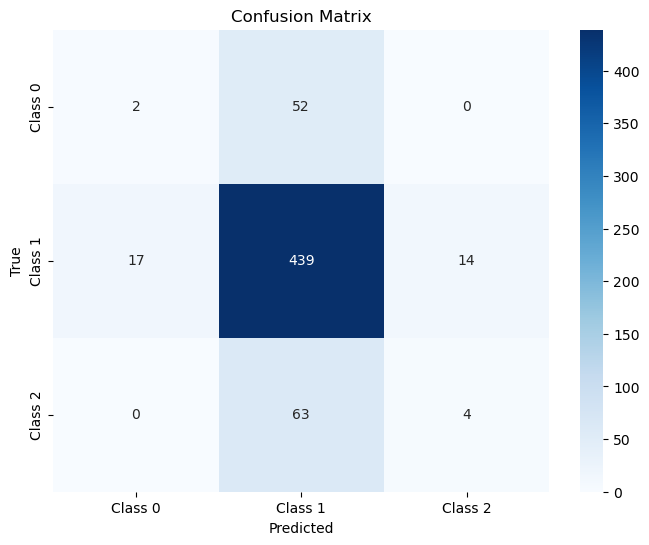

In [15]:
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Define class labels (if available)
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Show the plot
plt.show()

As expected we have just predictions on Class 1 since wwe habe the most examples

In [16]:
joined['class_rediced'] = pd.cut(joined['Similarity'], bins=[-1, 0.2, 1.5], labels=[0, 1], right=False)
joined

,article_id,title,paragraphs,ressort,authors,date,compared_article,Similarity,Top_Words,class,compared_article_title,combined_text,class_rediced
0,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_2015011427A7C80584,0.875,journalismus ffentlichkeit lgenpresse medienja...,2,Groß geworden mit Charlie,medienjahr bilanzieren attentat charlie hebdo ...,1
1,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20151111C499C672CF,0.500,journalismus ffentlichkeit lgenpresse medienja...,2,Zampano Murdoch verliert Werbeerlöse,medienjahr bilanzieren attentat charlie hebdo ...,1
2,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20150513D7DA00D0E8,0.438,journalismus ffentlichkeit lgenpresse medienja...,1,Wahlen in Großbritannien. Willkommen in der Me...,medienjahr bilanzieren attentat charlie hebdo ...,1
3,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_2015120262C41042D2,0.312,journalismus ffentlichkeit lgenpresse medienja...,1,Aus privat mach öffentlich,medienjahr bilanzieren attentat charlie hebdo ...,1
4,FALTER_201512234A05C075C5,Die Wahrheit über die Lügenpresse,"['Also, wie soll man ein Medienjahr bilanziere...",Medien,armin thurnher,2015-12-23 00:00:00+00:00,FALTER_20150114EFB539A4D6,0.125,journalismus ffentlichkeit lgenpresse medienja...,1,"Die Islam-Falle: It's not islam, it's religion...",medienjahr bilanzieren attentat charlie hebdo ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_201503113CDB7A5F2F,-0.292,geiger zwergflusspferd julian schriftsteller s...,1,Acht Jahre ohne Schwerkraft,bestsellerautoren zeichnen gewhnlich zurckhalt...,0
2951,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_2015040174B0CFCDBF,-0.333,geiger zwergflusspferd julian schriftsteller s...,1,Die Neue vom News-Tower,bestsellerautoren zeichnen gewhnlich zurckhalt...,0
2952,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_20150715F62B384AE7,-0.417,geiger zwergflusspferd julian schriftsteller s...,1,OLLAS LEIWAUND,bestsellerautoren zeichnen gewhnlich zurckhalt...,0
2953,FALTER_201502043AFFDEA0E6,"""Es geht um Befreiung""",['Bestsellerautoren zeichnen sich gewöhnlich n...,Feuilleton,sebastian fasthuber,2015-02-04 00:00:00+00:00,FALTER_20150408A2F8406B8A,-0.583,geiger zwergflusspferd julian schriftsteller s...,0,Ich suchte Gott. Also wurde ich Muslim,bestsellerautoren zeichnen gewhnlich zurckhalt...,0


In [17]:
joined.class_rediced.value_counts()

0    2028
1     927
Name: class_rediced, dtype: int64

We created new just 2 classes having > 0.2 is a positive class

In [18]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(tfidf_matrix, joined["class_rediced"], test_size=0.2, random_state=42)

In [19]:
classifier = LogisticRegression()
svm = SVC()
forest = RandomForestClassifier(n_estimators=300)

# Train the model
forest.fit(X_train_red, y_train_red)

# Evaluate the model
accuracy = forest.score(X_test_red, y_test_red)
print("Accuracy:", accuracy)

Accuracy: 0.6649746192893401


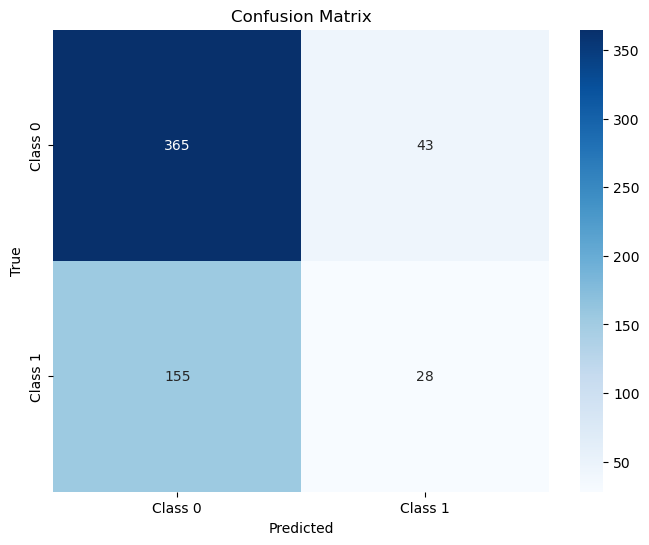

In [20]:
y_pred = forest.predict(X_test_red)

# Assuming you have predicted labels (y_pred) and true labels (y_true)
# Compute the confusion matrix
cm = confusion_matrix(y_test_red, y_pred)

# Define class labels (if available)
class_labels = ['Class 0', 'Class 1']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Show the plot
plt.show()

Here as well we can see how bad the machine learinig models are doing with classificatioon of the 2 texts

## Lets treat the problem as regression

In [21]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(tfidf_matrix, joined["Similarity"], test_size=0.2, random_state=42)

In [23]:
rid = Ridge()

In [24]:
rid.fit(X_train_reg, y_train_reg)

Ridge()

In [25]:
rid.score(X_test_reg, y_test_reg)

-0.1625764830372467

In [26]:
preds = rid.predict(X_test_reg)
mean_absolute_error(preds, y_test_reg)


0.33678162690094543

In [27]:
mean_squared_error(preds, y_test_reg)

0.183316445007557